## 9 Working With Images

###### Point to keep in mind : The geotransform and other parameters like projections, metadata, descriptions etc. are stored in dataset as a whole and not in band. So bands are void of those informations. While using the functions to gain those parameters will return error message or return nothing.

----------

# 9.2 Handling Images


### Load Image

In [1]:
import os
from osgeo import gdal

folder = '/home/hillson/Desktop/raster data/LC08_L1TP_141041_20200207_20200211_01_T1'

# Landsat images in visible spectrum

Landsat8_Band2path = os.path.join(folder,'LC08_L1TP_141041_20200207_20200211_01_T1_B2.TIF')
Landsat8_Band3path = os.path.join(folder,'LC08_L1TP_141041_20200207_20200211_01_T1_B3.TIF')
Landsat8_Band4path = os.path.join(folder,'LC08_L1TP_141041_20200207_20200211_01_T1_B4.TIF')

# Opening the file through GDAL.

blueDataset = gdal.Open(Landsat8_Band2path)
greenDataset= gdal.Open(Landsat8_Band3path)
redDataset = gdal.Open(Landsat8_Band4path)

# Creating List from the bands

bandListDataset = [blueDataset, greenDataset, redDataset]




### Getting Image Information

In [2]:
# Getting Number of bands information in bandList using RasterCount
print("RasterCount")
for image in bandListDataset:
    count = image.RasterCount
    print('{} = {}'.format(image,count))
    
print('\n')
    
# Assign band number to the variables

blueBand = blueDataset.GetRasterBand(1) # Note: Raster band count starts from 1.
greenBand = greenDataset.GetRasterBand(1)
redBand = redDataset.GetRasterBand(1)

bandList = [blueBand, greenBand, redBand]

# Getting Metadata
print("Metadata of Datasets")
for image in bandListDataset:
    print(image.GetMetadata())

print('\n')
    
#Getting Descriptions
print("Description of Datasets")
for image in bandListDataset:
    print(image.GetDescription())
    
print('\n')
    
#Getting Projections
print("Projection of Datasets")
for image in bandListDataset:
    print(image.GetProjection())
    print("\n")
    
#Getting GeoTransform
print("GeoTransform of Datasets")
for image in bandListDataset:
    print(image.GetGeoTransform())
    print("\n")
    
    
#Getting Image Size
# Not image.RasterXSize and image.RasterYSize works only in case of dataset
for image in bandListDataset:
    print('{} has {}*{} size'.format(image,image.RasterXSize,image.RasterYSize))
    
print("\n")

#In case of raster layer and not the dataset, we do this.
for image in bandList:
    print('{} has {}*{} size'.format(image,image.XSize,image.YSize))
    
print("\n")

# Getting Data Type
for band in bandList:
    print('DataType of band : ',band.DataType)
    
    
# Extras
Image = blueDataset
band = blueBand

Bands = Image.RasterCount      # how many bands, to help you loop
Rows  = Image.RasterYSize      # how many rows
Cols  = Image.RasterXSize      # how many columns
Type  = blueBand.DataType      # the datatype for this band


RasterCount
<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fe29ef0aa80> > = 1
<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fe29efc8210> > = 1
<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fe29ef0adb0> > = 1


Metadata of Datasets
{'AREA_OR_POINT': 'Point'}
{'AREA_OR_POINT': 'Point'}
{'AREA_OR_POINT': 'Point'}


Description of Datasets
/home/hillson/Desktop/raster data/LC08_L1TP_141041_20200207_20200211_01_T1/LC08_L1TP_141041_20200207_20200211_01_T1_B2.TIF
/home/hillson/Desktop/raster data/LC08_L1TP_141041_20200207_20200211_01_T1/LC08_L1TP_141041_20200207_20200211_01_T1_B3.TIF
/home/hillson/Desktop/raster data/LC08_L1TP_141041_20200207_20200211_01_T1/LC08_L1TP_141041_20200207_20200211_01_T1_B4.TIF


Projection of Datasets
PROJCS["WGS 84 / UTM zone 45N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenw

-----------------
### Getting Array from the Gdal Image


In [3]:
#Converts the band information to numpy array
blueArrayDS = blueDataset.ReadAsArray()     #datasource array
blueArray = blueBand.ReadAsArray()          #band array
#compare both the arrays if they are same
comparisonOfArray = blueArray == blueArrayDS
equal_arrays = comparisonOfArray.all()      #returns true as both of them are same. because in one single band image it's same array of datasource or its band.
print(equal_arrays)


#reading bands array
greenArray = greenBand.ReadAsArray()
redArray = redBand.ReadAsArray()

arrayListRGB = [redArray, greenArray, blueArray] 

#check
print(blueArray)


True
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


---------------------------
### Plotting the array

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

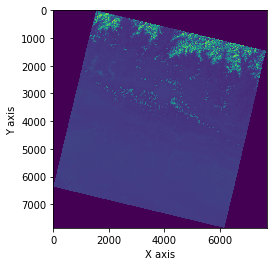

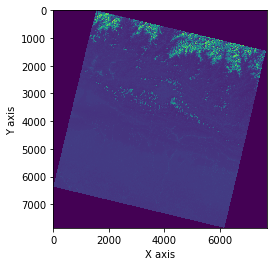

In [5]:
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.imshow(blueArray)
plt.show()

plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.imshow(greenArray)
plt.show()

In [6]:
#Few Numpy Operations
#Self Explanatory

print('shape of array:',np.shape(redArray))

print('min value in array:',redArray.min())
print('max value in array:',redArray.max())


#Quick Check between the above image numpy array and GDAL band data

###??????????????????????????????????????????????????????????  Something's wrong with THE CODE BELOW --- GIVING NONE;;; eXPECTION WERE TO GET THE SAME MIN AND MAX AS NUMPY ARRAY
# This happens when the band information has not been calculated beforehand.
#### Still there is no match between the array min and max value in numpy and that calculated by the goodal. !!!!!!!
# So calculate first the band informations.

min = redBand.GetMinimum()
max = redBand.GetMaximum()
if not min or not max:
    (min,max) = redBand.ComputeRasterMinMax(True)
    
    
print(min)
print(max)


# print(redBand.GetMinimum())
# print(redBand.GetMaximum())


shape of array: (7851, 7711)
min value in array: 0
max value in array: 57846
0.0
52219.0


np.mean(redArray)

### Histogram of Array

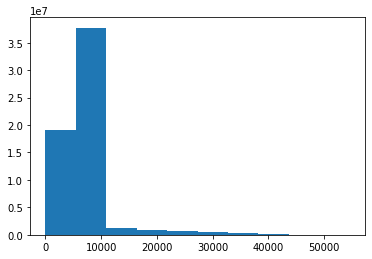

In [7]:
plt.hist(greenArray.ravel()); plt.show()

### Merging Bands

In [8]:
# gtiff_driver = gdal.GetDriverByName('GTiff')

# RGBds = gtiff_driver.Create('RGB.tif', redBand.XSize, redBand.YSize, 3,redBand.DataType)
# RGBds.SetProjection(redDataset.GetProjection())
# RGBds.SetGeoTransform(redDataset.GetGeoTransform())


# #Automating layer stacking or merging process
# i=1
# for arr in arrayListRGB:
#     RGBds.GetRasterBand(i).WriteArray(arr)
#     i=i+1
   
# RGBds.FlushCache()        # Please remember flushing the cache and delete the unused variable after its use for efficiency.
# del RGBds

-------------------
### Splitting Bands

In [9]:
file = 'RGB.tif'
RGBdata = gdal.Open(file)
print('Number of bands in the dataset: ',RGBdata.RasterCount)

Number of bands in the dataset:  3


In [10]:
RGBList = []
for i in range(RGBdata.RasterCount):
    a = i+1
    RGBList.append(RGBdata.GetRasterBand(a))

In [11]:
red = RGBList[0]
green = RGBList[1]
blue = RGBList[2]

---------------------------------
### Masking the Raster

### Resizing the Raster